<a href="https://colab.research.google.com/github/KarthikChary1/Data-Science/blob/master/LSTM(stack)using_timestamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas_datareader as pdr
import numpy


/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [ ]:
data=pdr.get_data_tiingo("AAPL",api_key="")

In [ ]:
data.head()

close    high  ...  divCash  splitFactor
symbol date                                       ...                      
AAPL   2015-08-03 00:00:00+00:00  118.44  122.57  ...     0.00          1.0
       2015-08-04 00:00:00+00:00  114.64  117.70  ...     0.00          1.0
       2015-08-05 00:00:00+00:00  115.40  117.44  ...     0.00          1.0
       2015-08-06 00:00:00+00:00  115.13  116.50  ...     0.52          1.0
       2015-08-07 00:00:00+00:00  115.52  116.25  ...     0.00          1.0

[5 rows x 12 columns]

In [ ]:
data.to_csv("AAPL.csv")

In [ ]:
import pandas as pd
data=pd.read_csv("AAPL.csv")

In [ ]:
data.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2015-08-03 00:00:00+00:00,118.44,122.57,117.520,121.50,69975968,109.145232,112.951123,108.297430,111.965093,69975968,0.00,1.0
1,AAPL,2015-08-04 00:00:00+00:00,114.64,117.70,113.250,117.42,124138623,105.643443,108.463304,104.362525,108.205278,124138623,0.00,1.0
2,AAPL,2015-08-05 00:00:00+00:00,115.40,117.44,112.100,112.95,98384461,106.343801,108.223708,103.302773,104.086068,98384461,0.00,1.0
3,AAPL,2015-08-06 00:00:00+00:00,115.13,116.50,114.115,115.97,52903040,106.574181,107.842371,105.634610,107.351757,52903040,0.52,1.0
4,AAPL,2015-08-07 00:00:00+00:00,115.52,116.25,114.500,114.58,38670405,106.935199,107.610949,105.990999,106.065054,38670405,0.00,1.0


In [ ]:
data.shape

(1257, 14)

In [ ]:
data1=data.reset_index()["close"]

In [ ]:
data1.tail()

1252    371.38
1253    370.46
1254    379.24
1255    373.01
1256    380.16
Name: close, dtype: float64

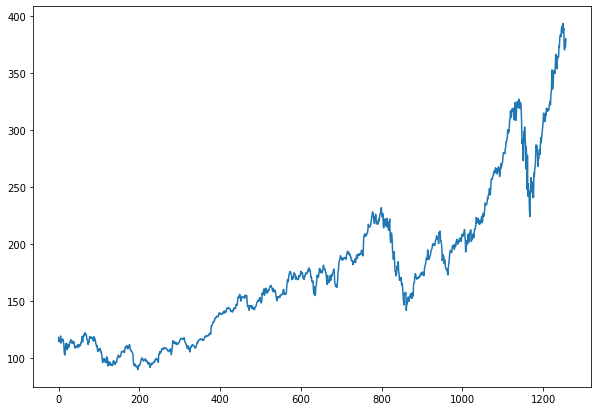

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(data1)

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))


In [ ]:
df1=scaler.fit_transform(np.array(data1).reshape(-1,1))

In [ ]:
df1

array([[0.09271174],
       [0.08017421],
       [0.08268171],
       ...,
       [0.95318222],
       [0.93262727],
       [0.95621763]])

In [ ]:
def create_dataset(dataset, look_back=100):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
dataset=df1
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

842 415


In [ ]:
X_train,y_train=create_dataset(train)

In [ ]:
X_test,y_test=create_dataset(test)

In [ ]:
#reshape input samples to 3dimensions (lstm required that)

In [ ]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [ ]:
#stack lstm model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense

In [ ]:
model=Sequential()

In [ ]:
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer="adam",loss="mean_squared_error",metrics="accuracy")

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=64,epochs=100,verbose=1)

Epoch 1/100
12/12 [==============================] - 3s 230ms/step - loss: 0.0161 - accuracy: 0.0013 - val_loss: 0.0552 - val_accuracy: 0.0032
Epoch 2/100
12/12 [==============================] - 2s 142ms/step - loss: 0.0031 - accuracy: 0.0013 - val_loss: 0.0038 - val_accuracy: 0.0032
Epoch 3/100
12/12 [==============================] - 2s 139ms/step - loss: 8.7118e-04 - accuracy: 0.0013 - val_loss: 0.0046 - val_accuracy: 0.0032
Epoch 4/100
12/12 [==============================] - 2s 140ms/step - loss: 7.0102e-04 - accuracy: 0.0013 - val_loss: 0.0035 - val_accuracy: 0.0032
Epoch 5/100
12/12 [==============================] - 2s 141ms/step - loss: 6.0742e-04 - accuracy: 0.0013 - val_loss: 0.0036 - val_accuracy: 0.0032
Epoch 6/100
12/12 [==============================] - 2s 144ms/step - loss: 5.5413e-04 - accuracy: 0.0013 - val_loss: 0.0034 - val_accuracy: 0.0032
Epoch 7/100
12/12 [==============================] - 2s 143ms/step - loss: 5.6835e-04 - accuracy: 0.0013 - val_loss: 0.0046 - 

In [ ]:
X_train_predict=model.predict(X_train)
X_test_predict=model.predict(X_test)

In [ ]:
test_pred=scaler.inverse_transform(X_test_predict)
train_pred=scaler.inverse_transform(X_train_predict)

In [ ]:
from numpy import sqrt
from sklearn.metrics import mean_squared_error

In [ ]:
sqrt(mean_squared_error(test_pred,y_test)),sqrt(mean_squared_error(train_pred,y_train))


(246.24438965047955, 149.82961347372066)

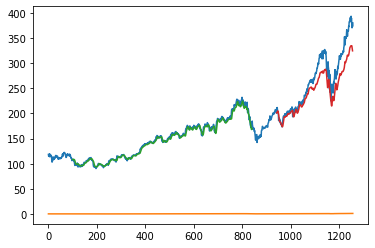

In [ ]:
import matplotlib.pylab as plt
%matplotlib inline
look_back=100
trainPredict =train_pred
testPredict = test_pred
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

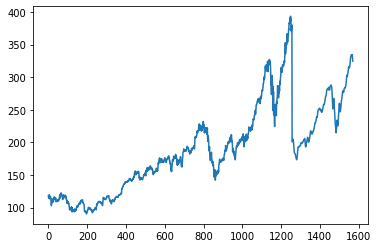